In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from glob import glob

In [3]:
buildings = gpd.read_parquet("/data/uscuni-ulce/extension/france/clean_3035.parquet")
buildings

,geometry,hauteur,date_d_apparition
0,MULTIPOLYGON Z (((3788020.649 2536079.906 376....,4.4,1950-01-01
1,MULTIPOLYGON Z (((3787414.898 2536357.469 417....,8.2,None
2,MULTIPOLYGON Z (((3787718.978 2537007.146 372....,6.5,1958-01-01
3,MULTIPOLYGON Z (((3787699.668 2537009.367 371....,4.7,None
4,MULTIPOLYGON Z (((3787568.536 2536864.521 379....,2.3,None
...,...,...,...
49506482,MULTIPOLYGON Z (((3785942.983 2536773.821 713....,4.4,None
49506483,MULTIPOLYGON Z (((3786019.24 2536640.269 717.6...,8.0,None
49506484,MULTIPOLYGON Z (((3786043.46 2536751.595 712.7...,2.6,None
49506485,MULTIPOLYGON Z (((3787303.276 2536449.049 436....,1.7,None


In [4]:
buildings.columns

Index(['geometry', 'hauteur', 'date_d_apparition'], dtype='object')

In [5]:
buildings.dtypes

geometry             geometry
hauteur               float64
date_d_apparition      object
dtype: object

In [6]:
buildings['date_d_apparition'] = pd.to_datetime(buildings['date_d_apparition'],errors='coerce', utc=True)
buildings

,geometry,hauteur,date_d_apparition
0,MULTIPOLYGON Z (((3788020.649 2536079.906 376....,4.4,1950-01-01 00:00:00+00:00
1,MULTIPOLYGON Z (((3787414.898 2536357.469 417....,8.2,NaT
2,MULTIPOLYGON Z (((3787718.978 2537007.146 372....,6.5,1958-01-01 00:00:00+00:00
3,MULTIPOLYGON Z (((3787699.668 2537009.367 371....,4.7,NaT
4,MULTIPOLYGON Z (((3787568.536 2536864.521 379....,2.3,NaT
...,...,...,...
49506482,MULTIPOLYGON Z (((3785942.983 2536773.821 713....,4.4,NaT
49506483,MULTIPOLYGON Z (((3786019.24 2536640.269 717.6...,8.0,NaT
49506484,MULTIPOLYGON Z (((3786043.46 2536751.595 712.7...,2.6,NaT
49506485,MULTIPOLYGON Z (((3787303.276 2536449.049 436....,1.7,NaT


In [7]:
buildings["year"] = buildings["date_d_apparition"].dt.year

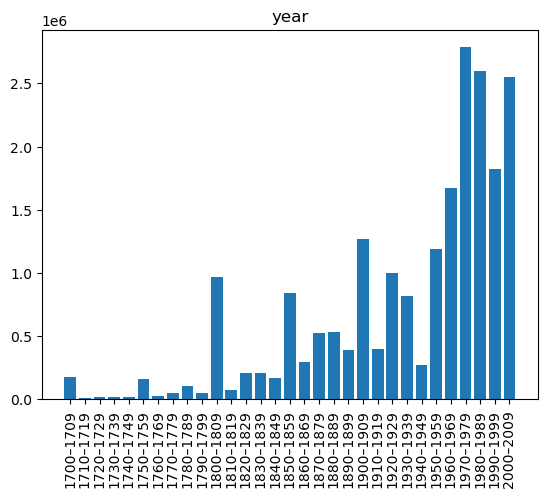

In [8]:
bins = list(range(1700, 2020, 10))
bin_centers = [(bins[i] + bins[i+1]) // 2 for i in range(len(bins)-1)]
bin_labels = [f'{bins[i]}–{bins[i+1]-1}' for i in range(len(bins)-1)]
buildings.hist(column="year",bins=bins, rwidth=0.8)
plt.xticks(bin_centers, bin_labels, rotation=90)
plt.grid(False)

In [9]:
files_morph = glob(f"/data/uscuni-ulce/data_product/extension_1/fr*_morphotopes.parquet")
morphotopes_list = []
for f in files_morph:
    data = gpd.read_parquet(f)
    morphotopes_list.append(data)
morphotopes = pd.concat(morphotopes_list).set_index("morphotope_id")
morphotopes

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label
morphotope_id,,,,,,,,,
473145_3_-3,"MULTIPOLYGON (((3882368.87 2269754.679, 388236...",True,1,2,3,4,6,12,25
473145_711_-744,"MULTIPOLYGON (((3883352.552 2271405.17, 388334...",True,1,2,3,4,6,12,25
473145_281_-299,"MULTIPOLYGON (((3884231.114 2274789.083, 38842...",True,1,2,3,4,6,12,25
473145_1053_-1131,"MULTIPOLYGON (((3884419.036 2274451.549, 38844...",True,1,2,3,4,6,12,25
473145_829_-869,"MULTIPOLYGON (((3886681.442 2275082.83, 388668...",True,1,2,3,4,6,10,21
...,...,...,...,...,...,...,...,...,...
532006_264_-327,"MULTIPOLYGON (((4138492.349 2751556.138, 41384...",True,1,2,3,4,7,13,26
532006_302_-376,"MULTIPOLYGON (((4138353.97 2751249.822, 413835...",True,1,2,3,4,7,13,26
532006_303_-377,"MULTIPOLYGON (((4137687.289 2751383.179, 41376...",True,1,2,4,5,8,16,33


In [10]:
gdf = gpd.GeoDataFrame(buildings[['year', 'hauteur','geometry']])
gdf = gdf.set_geometry(gdf.geometry.centroid)

In [11]:
gdf.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

In [12]:
morphotopes.index.is_unique

True

In [13]:
joined_morphotopes = gdf.sjoin(morphotopes[["geometry"]], predicate="within")
joined_morphotopes

,year,hauteur,geometry,morphotope_id
0,1950.0,4.4,POINT (3788024.568 2536070.942),437191_0_3
1,NaN,8.2,POINT (3787418.097 2536357.584),433186_0_6
2,1958.0,6.5,POINT (3787717.829 2536999.419),433186_0_6
3,NaN,4.7,POINT (3787710.069 2537018.679),433186_0_6
4,NaN,2.3,POINT (3787569.013 2536859.738),433186_0_6
...,...,...,...,...
49506482,NaN,4.4,POINT (3785945.302 2536772.061),433186_360_-305
49506483,NaN,8.0,POINT (3786029.605 2536621.697),433186_360_-305
49506484,NaN,2.6,POINT (3786043.736 2536744.742),433186_360_-305
49506485,NaN,1.7,POINT (3787304.997 2536449.826),433186_0_6


In [14]:
joined_morphotopes['year'].max()

np.float64(2025.0)

In [15]:
bins = list(range(1670,2040,10))
def mode_bin(x):
    binned = pd.cut(x, bins=bins, right=True)
    m = binned.mode()
    return m.iloc[0] if not m.empty else None

In [16]:
grouped = joined_morphotopes.groupby("morphotope_id")

In [17]:
grouped_stats = grouped.agg(
    num_buildings=('year', 'count'),  # <-- total number of buildings (rows)

    year_mean=('year', 'mean'),
    year_median=('year', 'median'),
    year_min=('year', 'min'),
    year_q10=('year', lambda x: x.quantile(0.1)),
    year_q90=('year', lambda x: x.quantile(0.9)),
    year_max=('year', 'max'),
    year_std=('year', 'std'),
    year_mode=('year', mode_bin)
).round(2)
grouped_stats

,num_buildings,year_mean,year_median,year_min,year_q10,year_q90,year_max,year_std,year_mode
morphotope_id,,,,,,,,,
1154_236_-322,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1154_48_152,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1154_48_153,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209659_0_-559,27,1876.74,1850.0,1800.0,1833.8,1980.6,2010.0,58.69,"(1840.0, 1850.0]"
209659_0_0,30,1885.97,1880.0,1800.0,1800.0,1994.2,2002.0,64.10,"(1790.0, 1800.0]"
...,...,...,...,...,...,...,...,...,...
536022_9_5,8,1967.50,1993.5,1880.0,1894.0,2010.3,2011.0,52.75,"(2000.0, 2010.0]"
536022_9_6,25,1984.92,1990.0,1890.0,1972.0,2009.2,2015.0,29.61,"(1980.0, 1990.0]"
536022_9_7,32,1914.59,1917.5,1800.0,1848.0,2005.7,2015.0,69.30,"(1840.0, 1850.0]"


In [22]:
morphotopes_age = morphotopes.join(grouped_stats, how='inner')
morphotopes_age

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,year_mean,year_median,year_min,year_q10,year_q90,year_max,year_std,year_mode
morphotope_id,,,,,,,,,,,,,,,,,,
473145_3_-3,"MULTIPOLYGON (((3882368.87 2269754.679, 388236...",True,1,2,3,4,6,12,25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473145_711_-744,"MULTIPOLYGON (((3883352.552 2271405.17, 388334...",True,1,2,3,4,6,12,25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473145_281_-299,"MULTIPOLYGON (((3884231.114 2274789.083, 38842...",True,1,2,3,4,6,12,25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473145_1053_-1131,"MULTIPOLYGON (((3884419.036 2274451.549, 38844...",True,1,2,3,4,6,12,25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473145_829_-869,"MULTIPOLYGON (((3886681.442 2275082.83, 388668...",True,1,2,3,4,6,10,21,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532006_264_-327,"MULTIPOLYGON (((4138492.349 2751556.138, 41384...",True,1,2,3,4,7,13,26,1,2010.00,2010.0,2010.0,2010.0,2010.0,2010.0,NaN,"(2000.0, 2010.0]"
532006_302_-376,"MULTIPOLYGON (((4138353.97 2751249.822, 413835...",True,1,2,3,4,7,13,26,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532006_303_-377,"MULTIPOLYGON (((4137687.289 2751383.179, 41376...",True,1,2,4,5,8,16,33,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
morphotopes_age = morphotopes_age[
    (morphotopes_age['num_buildings'] != 0) &
    (morphotopes_age['initially_noise'] == False)
]
morphotopes_age

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,year_mean,year_median,year_min,year_q10,year_q90,year_max,year_std,year_mode
morphotope_id,,,,,,,,,,,,,,,,,,
483878_11_5,"MULTIPOLYGON (((3892732.777 2269790.62, 389273...",False,1,1,1,1,2,4,6,83,1923.53,1915.0,1844.0,1911.0,1962.0,2003.0,24.73,"(1910.0, 1920.0]"
483878_11_7,"MULTIPOLYGON (((3893221.499 2270654.857, 38932...",False,2,4,7,12,18,41,76,49,1923.94,1916.0,1900.0,1915.0,1930.0,2006.0,21.46,"(1910.0, 1920.0]"
483878_11_8,"MULTIPOLYGON (((3893095.385 2270658.299, 38930...",False,2,4,7,12,18,41,76,129,1929.01,1921.0,1800.0,1910.0,1991.0,2013.0,29.43,"(1920.0, 1930.0]"
483878_11_1,"MULTIPOLYGON (((3893363.223 2271108.051, 38933...",False,1,1,2,3,4,8,15,53,1959.64,1964.0,1900.0,1901.0,2007.6,2014.0,32.78,"(1960.0, 1970.0]"
483878_11_3,"MULTIPOLYGON (((3893704.281 2271201.893, 38937...",False,2,4,8,17,24,55,103,96,1909.71,1898.0,1890.0,1897.0,1927.0,2016.0,26.20,"(1890.0, 1900.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532006_120_4,"MULTIPOLYGON (((4135500.135 2751944.602, 41355...",False,2,4,7,15,22,52,95,52,1988.75,1994.5,1966.0,1969.2,2004.8,2015.0,13.81,"(1990.0, 2000.0]"
532006_120_6,"MULTIPOLYGON (((4135409.842 2751890.38, 413540...",False,2,4,7,13,20,47,87,106,1918.75,1928.0,1730.0,1800.0,1983.5,2014.0,66.95,"(1970.0, 1980.0]"
532006_120_5,"MULTIPOLYGON (((4135409.804 2751572.052, 41354...",False,2,4,8,17,26,57,109,48,1885.98,1899.5,1750.0,1798.5,1980.8,2009.0,67.74,"(1890.0, 1900.0]"


In [25]:
morphometrics = pd.read_parquet("/data/uscuni-ulce/data_product/extension_1/morphotope_data_fr_sp_nl_be.parquet")

In [26]:
morphometrics

,sdbAre,sdbPer,sdbCoA,ssbCCo,ssbSqu,ssbERI,ssbElo,libNCo,ldbPWL,ltcBuA,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
morph,,,,,,,,,,,,,,,,,,,,,
153563_0_0,84.967397,39.524849,0.0,0.538690,3.703796,0.994277,0.696800,0.0,80.255405,0.833333,...,0.427988,0.897418,0.369202,28.155355,2.749349,2.749349,71.840656,54.241224,1.0,9404.260614
153563_0_1,54.962384,33.112656,0.0,0.522102,3.068997,0.999409,0.674793,0.0,35.212134,1.000000,...,0.677266,1.004077,0.534053,12.324184,1.769167,1.769167,39.998776,58.115269,1.0,3148.444124
153563_0_2,57.382490,33.596235,0.0,0.490358,3.997701,0.977219,0.633853,0.0,35.555409,1.000000,...,0.636667,0.972696,0.491028,12.465614,1.699406,1.699406,42.276225,43.100418,1.0,1928.464005
153563_0_3,54.898221,32.248557,0.0,0.505195,2.919930,0.970835,0.661089,0.0,33.681152,1.000000,...,0.667180,0.980565,0.521436,12.199974,1.715397,1.715397,48.527820,51.182159,1.0,1929.576295
153563_0_4,58.285315,35.033985,0.0,0.497291,2.304499,0.948036,0.607937,0.0,36.712243,1.000000,...,0.611814,0.952486,0.506956,13.081214,1.749055,1.749055,32.510727,71.554332,1.0,1563.998958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536022_9_5,49.858452,30.909048,0.0,0.526940,1.866070,0.997566,0.610559,0.0,35.651201,1.000000,...,0.592516,0.999200,0.511188,13.191252,1.934104,1.934104,77.993472,141.883897,1.0,3308.496936
536022_9_6,117.887759,50.513171,0.0,0.498238,1.180076,0.996931,0.588772,0.0,66.157301,0.898990,...,0.595054,0.995515,0.512370,23.671776,3.108021,3.108021,216.134972,286.604093,1.0,18034.862208
536022_9_7,36.681189,24.726904,0.0,0.579266,2.268461,0.999493,0.781020,0.0,32.849033,0.857143,...,0.771013,1.003231,0.575049,11.601229,1.802666,1.802666,32.711933,55.525906,1.0,2027.253337


In [28]:
joined = morphotopes_age.join(morphometrics,how='left')
joined

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
morphotope_id,,,,,,,,,,,,,,,,,,,,,
483878_11_5,"MULTIPOLYGON (((3892732.777 2269790.62, 389273...",False,1,1,1,1,2,4,6,83,...,0.507157,0.901393,0.431894,28.997739,3.457417,3.457417,88.634839,94.169161,1.0,9739.330948
483878_11_7,"MULTIPOLYGON (((3893221.499 2270654.857, 38932...",False,2,4,7,12,18,41,76,49,...,0.393028,0.826700,0.294159,34.920752,2.997175,2.997175,37.757262,55.333813,1.0,4035.617791
483878_11_8,"MULTIPOLYGON (((3893095.385 2270658.299, 38930...",False,2,4,7,12,18,41,76,129,...,0.624465,0.754920,0.463325,21.349775,2.450073,2.450073,31.918897,39.710241,1.0,4982.620881
483878_11_1,"MULTIPOLYGON (((3893363.223 2271108.051, 38933...",False,1,1,2,3,4,8,15,53,...,0.664117,0.998579,0.535040,18.377784,2.623197,2.623197,58.638190,312.830201,0.0,22181.556838
483878_11_3,"MULTIPOLYGON (((3893704.281 2271201.893, 38937...",False,2,4,8,17,24,55,103,96,...,0.102283,0.994327,0.126292,101.673796,4.572050,4.572050,26.219521,16.150865,1.0,6452.503903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532006_120_4,"MULTIPOLYGON (((4135500.135 2751944.602, 41355...",False,2,4,7,15,22,52,95,52,...,0.769024,0.964250,0.576369,18.267817,2.830500,2.830500,95.571667,96.368180,1.0,6631.608607
532006_120_6,"MULTIPOLYGON (((4135409.842 2751890.38, 413540...",False,2,4,7,13,20,47,87,106,...,0.621641,0.917922,0.479623,19.655636,2.725132,2.725132,58.517959,66.234961,1.0,7181.585813
532006_120_5,"MULTIPOLYGON (((4135409.804 2751572.052, 41354...",False,2,4,8,17,26,57,109,48,...,0.750954,0.743220,0.354245,33.462678,2.783624,2.783624,74.300931,61.037182,1.0,6009.680646


In [33]:
joined.to_parquet("/data/uscuni-evolution/all_joined_fr.parquet")